In [1]:
import os
import sys
os.chdir("..") 

********************

   Going to generate c302_C2_SinusoidalInputTest and run for 1000 on jNeuroML_NEURON

********************
Set default parameters for C
Set default parameters for C2
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MVL07 at (-80,-90,-80)
c302      >>>  Positioning muscle: MVL08 at (-80,-60,-80)
c302      >>>  Positioning muscle: MVL09 at (-80,-30,-80)
c302      >>>  Positioning muscle: MVR07 at (-80,-90,80)
c302      >>>  Positioning muscle: MVR08 at (-80,-60,80)
c302      >>>  Positioning muscle: MVR09 at (-80,-30,80)
c302      >>>  Positioning muscle: MDL07 at (80,-90,-80)
c302      >>>  Positioning muscle: MDL08 at (80,-60,-80)
c302      >>>  Positioning muscle: MDL09 at (80,-30,-80)
c302      >>>  Positioning muscle: MDR07 at (80,-90,80)
c302      >>>  Pos

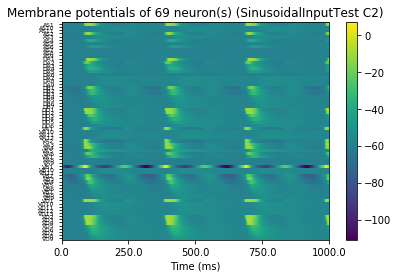

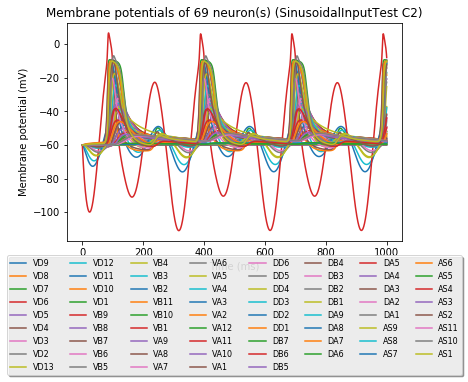

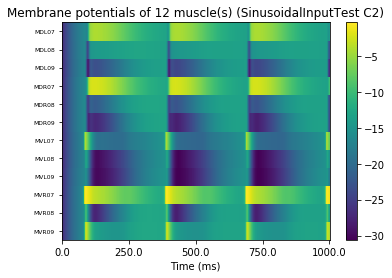

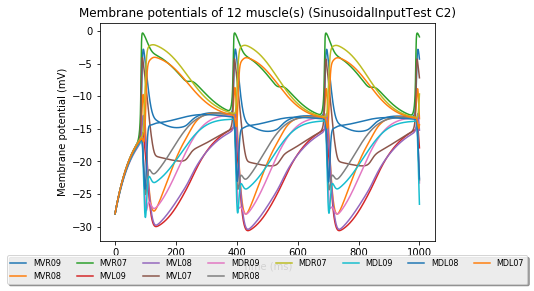

In [2]:
from runAndPlot import run_c302

%matplotlib inline
cells, cells_to_stimulate, params, muscles = run_c302('SinusoidalInputTest','C2','',1000,0.05,'jNeuroML_NEURON',verbose=False, plot_ca=False, data_reader="UpdatedSpreadsheetDataReader", config_package="notebooks.configs")